In [1]:
import time, os
import numpy as np
import matplotlib.pyplot as plt

import contrib_dro as dro
import contrib_rt as rt
import contrib_syst as syst

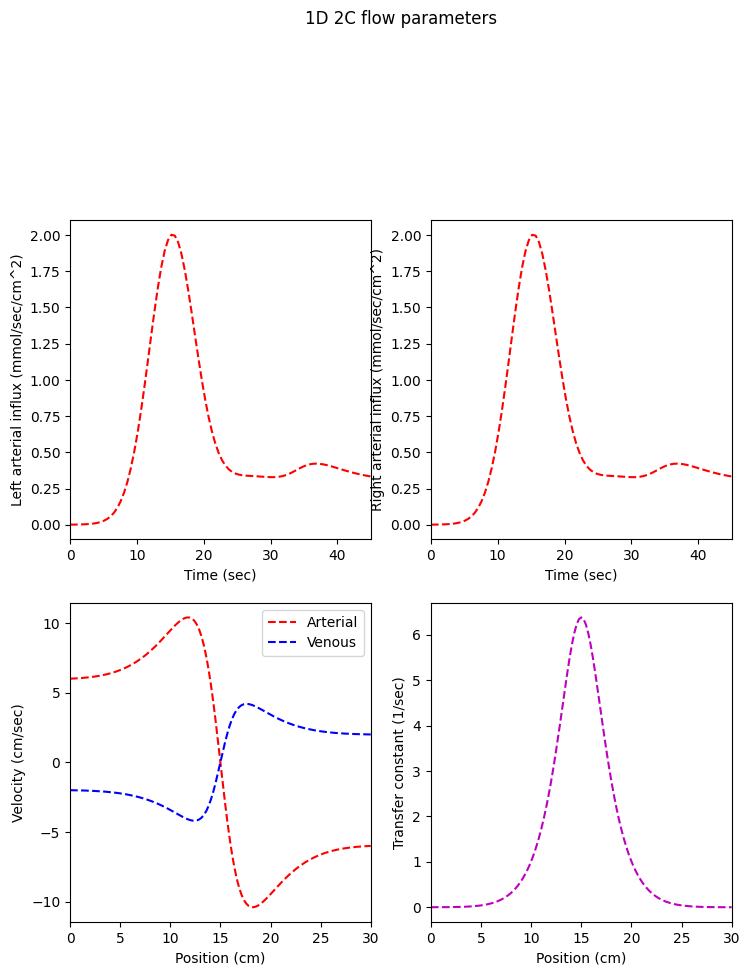

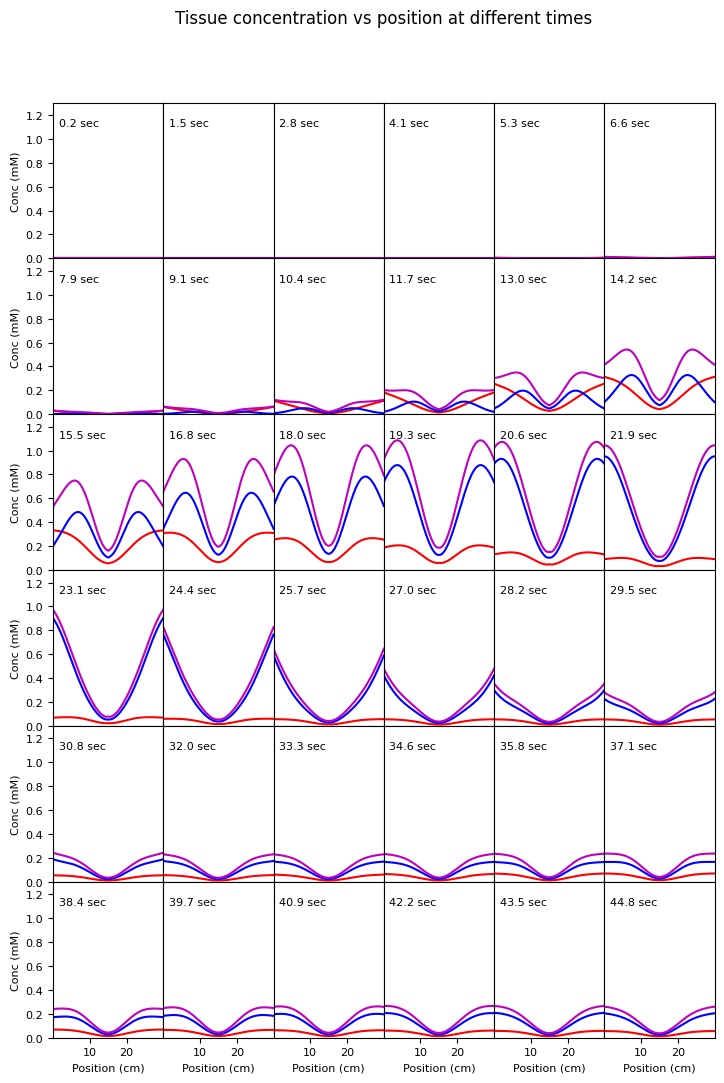

In [2]:
truth = dro.organ_perf_1d(step=False, tmax=45)
truth.calc_conc(split=True)
truth.plot_pars()
truth.plot_split_conc()

In [7]:
rec = syst.Perf1D(
    dim=truth.dim, mat=truth.mat,
    Jpa=[1,1], Jna=[1,1], 
    ua=[1,1], uv=[1,1], 
    Kva = [1,1],
    nx=truth.nx, umax=30, Jmax=5, Kmax=10, 
    )

In [ ]:
start = time.time()
p, pcov, pcorr = rec.fit_to(truth.C, xtol=1e-1)
print('Calculation time (mins): ', (time.time()-start)/60)
print('Parameter correction (%): ', 100*pcorr)
rec.plot_conc(data=truth.C)
rec.plot_pars(truth=truth)

In [ ]:
start = time.time()
rec.resample((2,2))
p, pcov, pcorr = rec.fit_to(truth.C, xtol=1e-1)
print('Calculation time (mins): ', (time.time()-start)/60)
print('Parameter correction (%): ', 100*pcorr)
rec.plot_conc(data=truth.C)
rec.plot_pars(truth=truth)

mres level:  0
>> calculation time (mins):  0.9216870903968811
>> parameter correction (%):  82.3416134853001
mres level:  1
>> calculation time (mins):  4.431024515628815
>> parameter correction (%):  491.36029446131033
mres level:  2
>> calculation time (mins):  6.467449367046356
>> parameter correction (%):  79.87469355599143
mres level:  3
>> calculation time (mins):  29.36756467819214
>> parameter correction (%):  55.308344422077894
mres level:  4
>> calculation time (mins):  3.544940876960754
>> parameter correction (%):  2.8608424209530003
mres level:  5
>> calculation time (mins):  11.650991483529408
>> parameter correction (%):  3.0763062176896243
mres level:  6
>> calculation time (mins):  41.53874394098918
>> parameter correction (%):  5.981814908257433
mres level:  7
>> calculation time (mins):  45.02404806613922
>> parameter correction (%):  0.5548981740761526
Multi-resolution calculation time (mins):  143.01686095794042


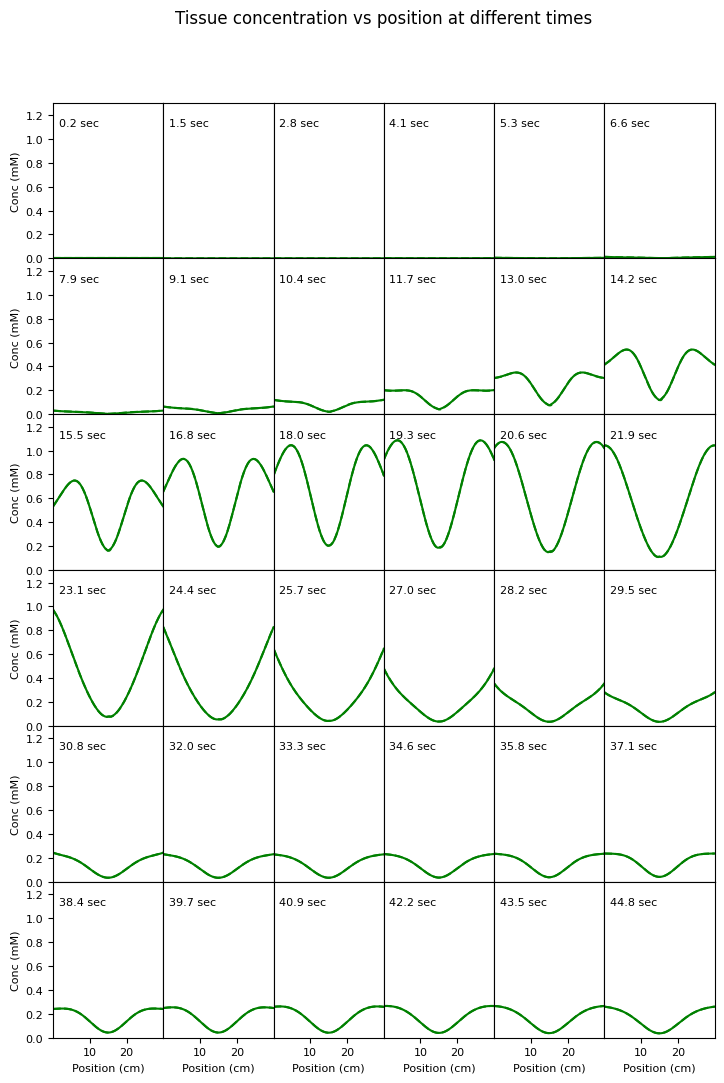

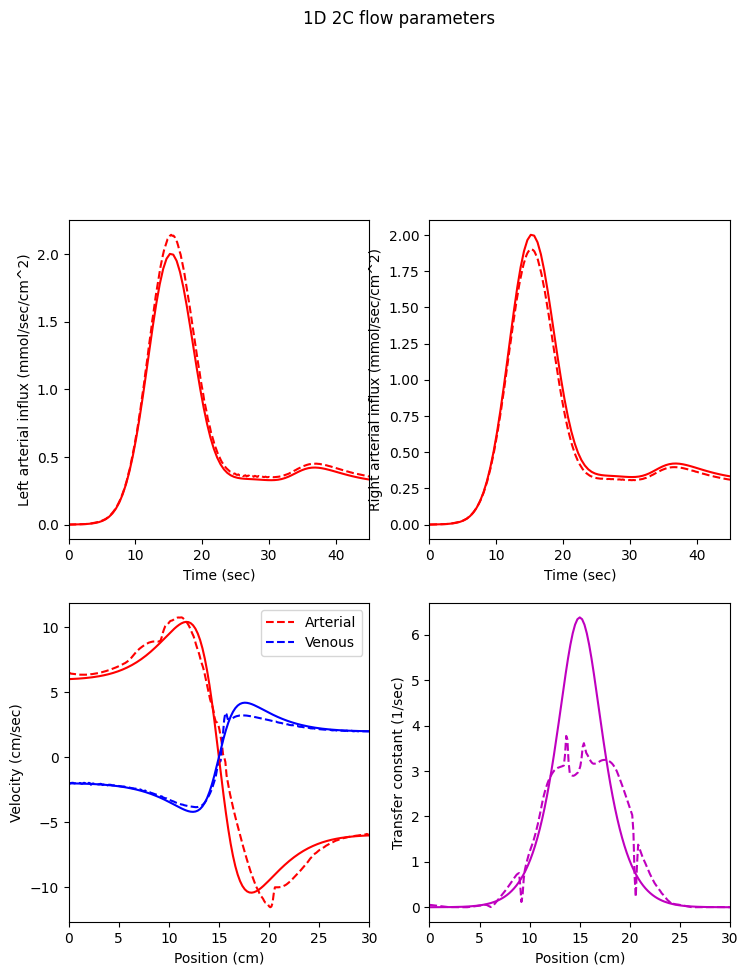

In [8]:
start = time.time()
path = os.path.abspath("")
p, pcov = rec.mres_fit_to(truth.C, xtol=1e-4, mxtol=1e-2, export_path=path)
rec.plot_conc(data=truth.C)
rec.plot_pars(truth=truth)